<a href="https://colab.research.google.com/github/Lojain12/Flight_Price/blob/main/Copy_of_FlightPricePrediction1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Flight price prediction**
### Our goal is to build supervised Natural Language Processing (NLP) machine learning models to predict the price of a flight.

### **Import Libaries**

In [597]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
import os
import tarfile
import urllib

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score


### **Load the data**

In [598]:
flight = pd.read_csv("Flight_price.csv")
flight.head()

,number,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,lead_reservation,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Take a 100,000 sample

In [599]:
flight = flight.sample(n=50000, random_state=42)

### **View data**

In [600]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 27131 to 15601
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   number            50000 non-null  int64  
 1   airline           50000 non-null  object 
 2   flight            50000 non-null  object 
 3   source_city       50000 non-null  object 
 4   departure_time    50000 non-null  object 
 5   stops             50000 non-null  object 
 6   arrival_time      50000 non-null  object 
 7   destination_city  50000 non-null  object 
 8   class             50000 non-null  object 
 9   duration          50000 non-null  float64
 10  lead_reservation  50000 non-null  int64  
 11  price             50000 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 5.0+ MB


In [601]:
flight.describe()

,number,duration,lead_reservation,price
count,50000.00000,50000.000000,50000.000000,50000.000000
mean,150015.80588,12.245605,26.012500,20827.466020
std,86528.55104,7.179290,13.531321,22658.672268
min,0.00000,0.830000,1.000000,1105.000000
25%,75307.50000,6.830000,15.000000,4784.000000
50%,150187.50000,11.250000,26.000000,7424.000000
75%,224778.25000,16.170000,38.000000,42521.000000
max,300152.00000,47.750000,49.000000,114705.000000


In [602]:
flight.shape

(50000, 12)

**Check number of null values**

In [603]:
flight.isnull().sum()

number              0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
lead_reservation    0
price               0
dtype: int64

Check duplicates 

In [604]:
flight.duplicated().sum()

0

number of unique data for each feature

In [605]:
flight.nunique()

number              50000
airline                 6
flight               1438
source_city             6
departure_time          6
stops                   3
arrival_time            6
destination_city        6
class                   2
duration              432
lead_reservation       49
price                6648
dtype: int64

As we understand from the result above, the "number" column is an index since its unique values are just like the size of our dataset, which is 300153.
So, it will be dropped from our dataset.

In [606]:
flight.drop(["number"], axis=1, inplace=True)

In [607]:
flight.drop(["flight"], axis=1, inplace=True)

In [608]:
flight.shape

(50000, 10)

convert price from int to float

In [609]:
flight['price'] = flight['price'].astype(float)

In [ ]:
class_1hot.shape

In [611]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 27131 to 15601
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           50000 non-null  object 
 1   source_city       50000 non-null  object 
 2   departure_time    50000 non-null  object 
 3   stops             50000 non-null  object 
 4   arrival_time      50000 non-null  object 
 5   destination_city  50000 non-null  object 
 6   class             50000 non-null  object 
 7   duration          50000 non-null  float64
 8   lead_reservation  50000 non-null  int64  
 9   price             50000 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.2+ MB


In [612]:
flight_dumm = pd.get_dummies(flight)
flight= pd.concat([flight_dumm], axis=1)
print(flight_dumm)

        duration  lead_reservation    price  airline_AirAsia  \
27131      19.75                40   7366.0                0   
266857      9.83                42  64831.0                0   
141228     10.50                41   6195.0                0   
288329     14.50                14  60160.0                0   
97334       8.25                20   6578.0                0   
...          ...               ...      ...              ...   
50691      14.25                39   5828.0                0   
22037      16.00                13   5954.0                0   
233495     16.33                41  85744.0                0   
107611     14.42                35   7978.0                0   
15601       5.58                29   3671.0                0   

        airline_Air_India  airline_GO_FIRST  airline_Indigo  airline_SpiceJet  \
27131                   1                 0               0                 0   
266857                  0                 0               0          

In [613]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 27131 to 15601
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      50000 non-null  float64
 1   lead_reservation              50000 non-null  int64  
 2   price                         50000 non-null  float64
 3   airline_AirAsia               50000 non-null  uint8  
 4   airline_Air_India             50000 non-null  uint8  
 5   airline_GO_FIRST              50000 non-null  uint8  
 6   airline_Indigo                50000 non-null  uint8  
 7   airline_SpiceJet              50000 non-null  uint8  
 8   airline_Vistara               50000 non-null  uint8  
 9   source_city_Bangalore         50000 non-null  uint8  
 10  source_city_Chennai           50000 non-null  uint8  
 11  source_city_Delhi             50000 non-null  uint8  
 12  source_city_Hyderabad         50000 non-null  uint8  
 1

In [614]:
flight.head()

,duration,lead_reservation,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,...,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
27131,19.75,40,7366.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
266857,9.83,42,64831.0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0
141228,10.50,41,6195.0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,1
288329,14.50,14,60160.0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
97334,8.25,20,6578.0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1


**Draw histogram to view the numeric values distribution**

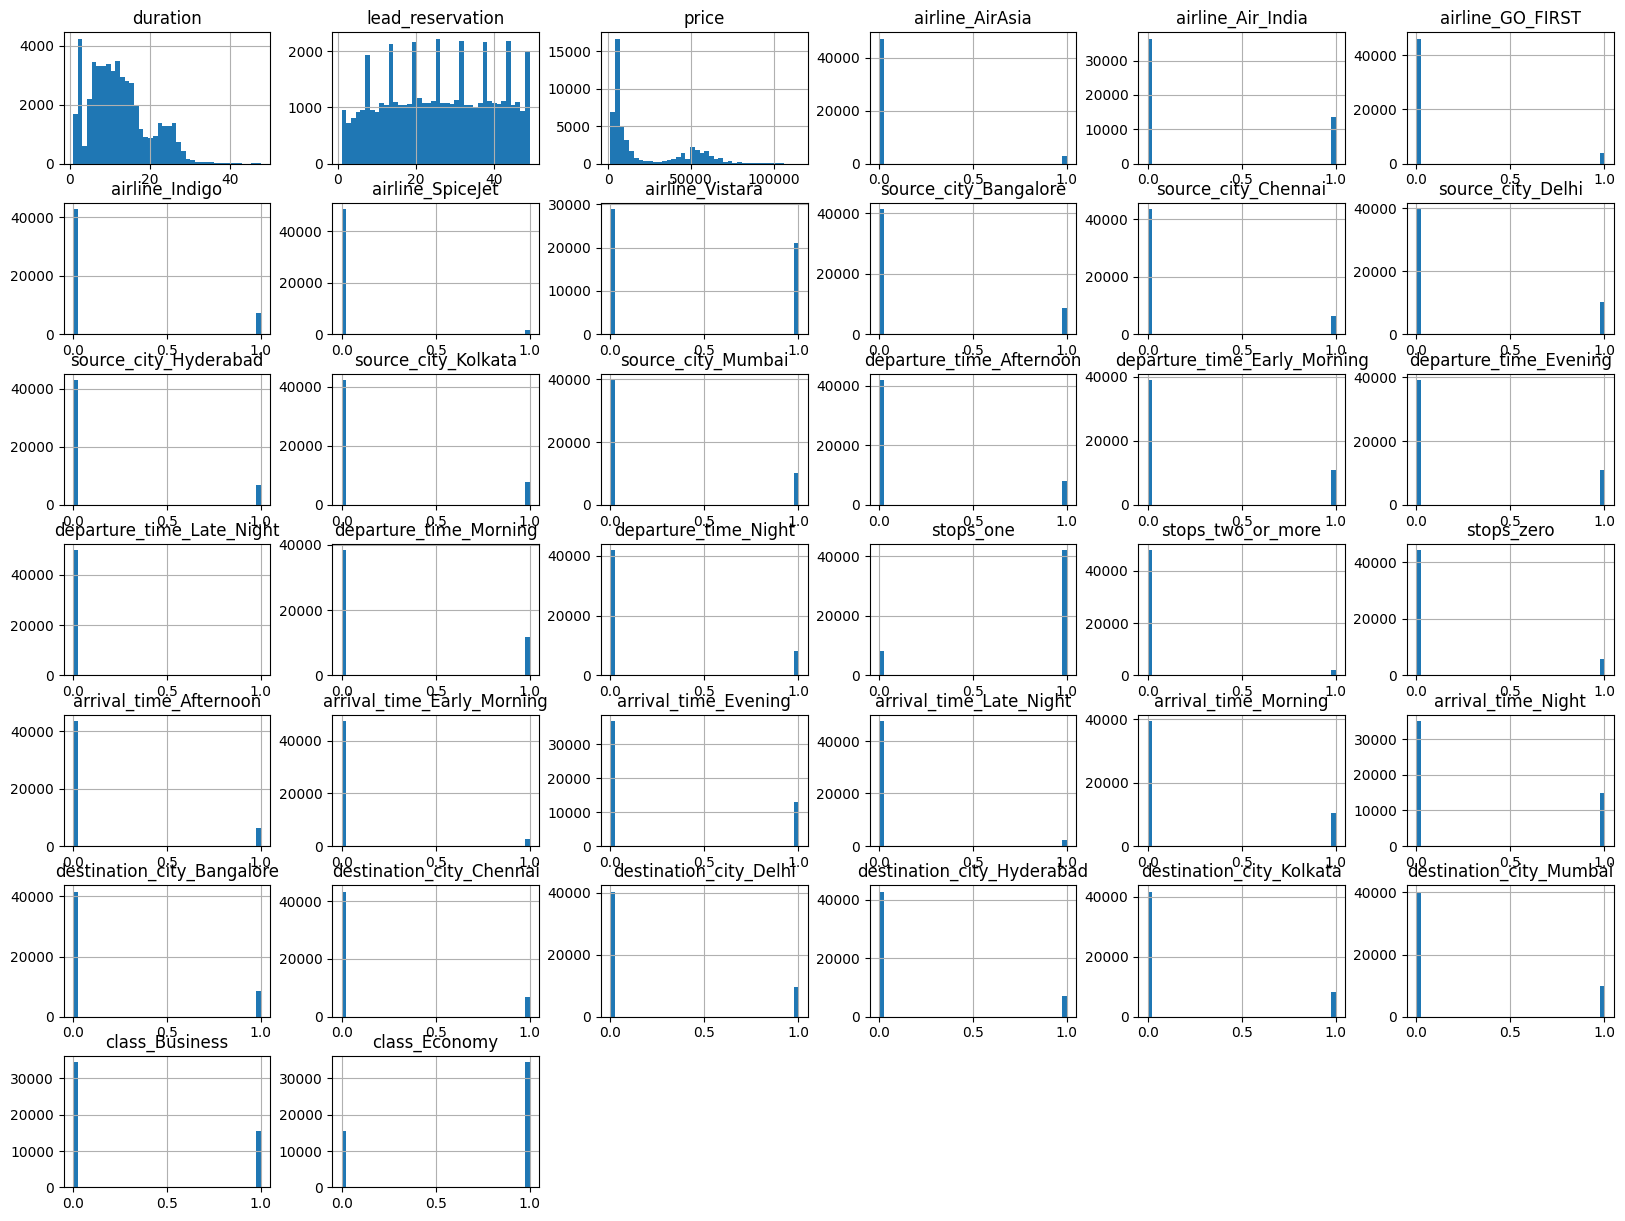

In [615]:
%matplotlib inline
import matplotlib.pyplot as plt
flight.hist(bins=40, figsize=(20,15))
plt.show()

**Detect and Remove outliers** 

In [ ]:
flight.info()

### **Get the size of taining set and test set**

In [617]:
#using Scikit-Learn train_test_split()
train_set, test_set = train_test_split(flight, test_size=0.2, random_state=42)
print("size of training data",len(train_set))
print("size of testing data",len(test_set))

size of training data 40000
size of testing data 10000


In [620]:
flightX = train_set.drop("price", axis =1)
flightY = train_set["price"].copy()
X_train, X_test, y_train, y_test = train_test_split(flightX, flightY, test_size=0.2, random_state=42)

### **Linear Regression**




In [621]:
from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression()
lin_reg.fit(flightX, flightY)
lin_reg_pred= lin_reg.predict(flightX)
lin_mse= mean_squared_error(flightY, lin_reg_pred)
lin_rmse= np.sqrt(lin_mse)
print("Linear Regression mean squared error: ", lin_rmse)
print("Accuracy: ",lin_reg.score(flightX, flightY))

Linear Regression mean squared error:  6728.9015087650805
Accuracy:  0.9116269467141701


In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())

In [ ]:
lin_scores = cross_val_score(lin_reg,flightX,flightY, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(flightX,flightY)
forest_price_predicitons= forest_reg.predict(flightX)
regr_score = forest_reg.score(flightX, flightY)
forest_mse= mean_squared_error(flightY, forest_price_predicitons)
forest_rmse= np.sqrt(forest_mse)
forest_rmse

In [ ]:
print("Accuracy: ", regr_score)

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())

In [591]:
from sklearn.model_selection import cross_val_score
forest_scores = cross_val_score(forest_reg,flightX,flightY, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores= np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [2727.64911108 2789.31257751 2840.24278884 2875.63881547 2791.43525367
 2759.48066371 2778.87039561 2875.04391033 2786.22491351 2914.17148262]
Mean: 2813.8069912350875
Standard Deviation: 56.39269023664421


In [592]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(flightX, flightY) #train the model
price_predictions = tree_reg.predict(flightX) #predict
tree_score = tree_reg.score(flightX, flightY)
tree_mse = mean_squared_error (flightY, price_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

493.3061042365919

In [593]:
print("Accuracy: ", tree_score)

Accuracy:  0.9995274060541616


In [594]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, flightX, flightY, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
display_scores(tree_rmse_scores)